In [1]:
# We import all the libraries that we need in our analysis and we will import others as we need them.

import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset.

df_games = pd.read_csv('board_games.csv')

## Scenario:  
  
You have been retained by a retail company to analyse a dataset based on board games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.   
  
Each answer MUST have a separate visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must generated using python.  
   
The companies CTO also requires you to rationalize all the decisions that you have made in your report.   
  
This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant.   


Vista previa de nuestra base de datos "df_games".

En primera instancia vamos a realizar una vista previa de nuestra base de datos para poder identificar algunas caracteristicas especiales y asi poder entender nuestros datos y posteriormente realizar los analisis de acuerdo al escenario propuesto.

En esta imagen podemos el Data Dictionary de nuestro data frame llamado "df_games" donde podemos observar la descripcion de cada columna, la clase y el nombe de la variable.

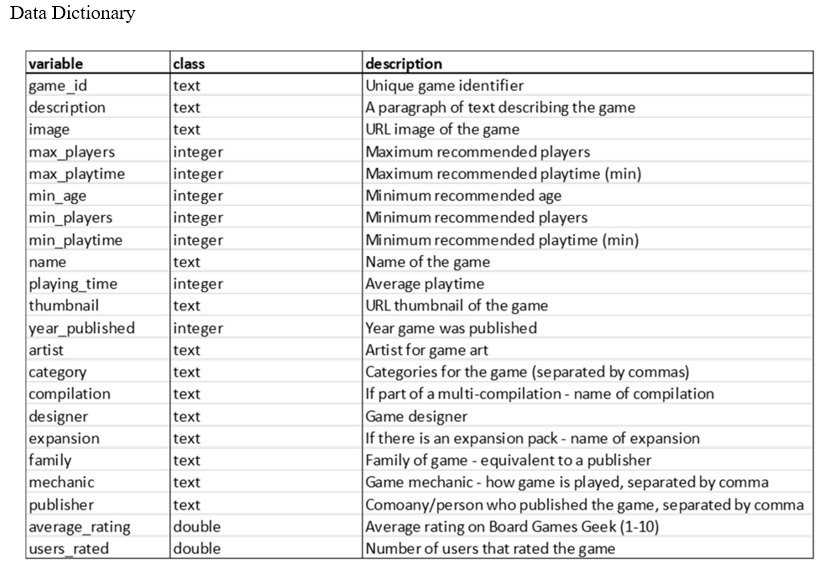

In [3]:
# Data Dictionary
from IPython.display import Image
Image(filename =r'Data_Dictionary.jpg')

Con la funcion "df_games.head() podemos observar como esta compuesto nuestro "df_games" y la informacion que contiene cada columna y fila.  

In [4]:
df_games.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


Con la funcion "df_games.shape" podemos ver la cantidad de columnas (22) y la cantidad de filas (10532) que contiene nuestro Data Frame.

In [5]:
df_games.shape

(10532, 22)

Con la funcion "df_games.describe()" podemos obtener un un rápido resumen estadístico de nuestro Data Frame pero solo para las columnas numéricas.

1.- count: Número de elementos no nulos.

2.- mean: Media de los valores.

3.- std: Desviación estándar.

4.- min: Valor mínimo.

5.- 25%: Percentil 25.

6.- 50%: Mediana o percentil 50.

7.- 75%: Percentil 75.

8.- max: Valor máximo.

In [6]:
df_games.describe()

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000
mean,62059.203095,5.657330,91.341436,9.714964,2.070547,80.882738,91.341436,2003.070832,6.370856,870.081466
std,66223.716828,18.884403,659.754400,3.451226,0.664394,637.873893,659.754400,12.278296,0.850364,2880.214998
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,1.384210,50.000000
25%,5444.500000,4.000000,30.000000,8.000000,2.000000,25.000000,30.000000,1998.000000,5.829585,85.000000
50%,28822.500000,4.000000,45.000000,10.000000,2.000000,45.000000,45.000000,2007.000000,6.392965,176.000000
75%,126409.500000,6.000000,90.000000,12.000000,2.000000,90.000000,90.000000,2012.000000,6.942675,518.000000
max,216725.000000,999.000000,60000.000000,42.000000,9.000000,60000.000000,60000.000000,2016.000000,9.003920,67655.000000


Con la funcion "df_games.describe(include=object)" podemos observar estadísticas descriptivas solo para las columnas de tipo "object", que suelen ser columnas de texto o cadenas de caracteres (strings).

1.- count: Número de elementos no nulos.

2.- unique: Número de valores únicos.

3.- top: Moda o valor que aparece con más frecuencia.

4.- freq: Frecuencia de la moda (número de veces que aparece el valor más frecuente).

In [7]:
df_games.describe(include=object)

,description,image,name,thumbnail,artist,category,compilation,designer,expansion,family,mechanic,publisher
count,10532,10531,10532,10531,7759,10438,410,10406,2752,7724,9582,10529
unique,10528,10527,10357,10527,4641,3860,336,4678,2634,3918,3209,5512
top,How could that have happened? Black Stories ar...,//cf.geekdo-images.com/images/pic2410035.png,Robin Hood,//cf.geekdo-images.com/images/pic2410035_t.png,Franz Vohwinkel,"Wargame,World War II","Traveller: The Classic Games, Games 1-6+",(Uncredited),"Règlement de l'An XXX,Regulations of the Year ...",Crowdfunding: Kickstarter,Hex-and-Counter,GMT Games
freq,3,2,5,2,166,449,8,558,7,391,523,180


Con la funcion "df_games.info()" podemos observar una rápida comprensión de la estructura y los datos contenidos en el DataFrame.

1.- Rango del Índice: Muestra cuántas entradas hay en total en el DataFrame.

2.- Columnas y tipos de datos: Enumera todas las columnas del DataFrame junto con el tipo de dato que contienen y la cantidad de valores no nulos que hay en cada una.

3.- Tipos de datos: Muestra cuántas columnas hay de cada tipo de dato (int64, float64, object, etc.).

4.- Uso de memoria: Indica la cantidad de memoria que está utilizando el DataFrame en la memoria del sistema.

In [8]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

Con la funcion "num_nulls = df_games.isna().sum()" podemos contar la cantidad de valores nulos (o NaN) en cada columna de nuestro DataFrame.

Aqui ya no podemos obtener una fotografia inicial de las columnas que contienen valores nulos y que mas adelante realizaremos una limpieza y analisis mas profundo ya que estos valores pueden afectar nuestro analisis.

In [9]:
num_nulls = df_games.isna().sum()
print(num_nulls)

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64


## Part 1: (Column Names are denoted by quotation marks)
  
•	What are the top 5 “average rated” games?

•	Is there a correlation between the “users_rated” and the “max_playtime”?

•	What is the distribution of game categories? (You may not use a barchart)

•	Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?

•	What are the 5 most common “mechanics” in the dataset?

### What are the top 5 “average rated” games?

Antes de optener los top 5 de average rated de nuestra columna "average_rating" primero debemos revisar la columna y limpiar datos si es que corresponde.

En el analisis anterior pudimos observar que no hay nulos en la columna "average_rating" pero con la funcion "df_games["average_rating"].describe()" podemos revisar datos estadisticos de esta columna.

Aqui podriamos asumir que el "average_rating" va de 0-9 con una puntuacion minima de 1.38 y una puntuacion maxima de 9 y el promedio de los juegos tiene una puntuacion de 6.39.

In [10]:
df_games["average_rating"].describe()

count    10532.000000
mean         6.370856
std          0.850364
min          1.384210
25%          5.829585
50%          6.392965
75%          6.942675
max          9.003920
Name: average_rating, dtype: float64

Una de las formas mas simples de poder graficar estos datos es atraves de un Boxplot, el cual nos muestra los datos estadisticos del cuadro anterior donde:

a.- Línea inferior del rectángulo (Q1): Esta línea representa el primer cuartil de los datos, es decir, el 25% de los datos están por debajo de 5.829585.

b.- Línea superior del rectángulo (Q3): Esta línea representa el tercer cuartil, es decir, el 75% de los datos están por debajo de 6.942675.

c.- Línea dentro del rectángulo (Mediana o Q2): Representa el valor mediano de los datos. El 50% de los datos están por debajo de 6.392965 y el 50% están por encima.

d.- Bigotes (Whiskers): Estas líneas se extienden desde el rectángulo y representan la variabilidad fuera de los cuartiles superior e inferior y nos ayuda a identificar valores atípicos.

e.- Puntos fuera de los bigotes: Estos son considerados "valores atípicos" o "outliers". Son valores que se desvían significativamente del resto.

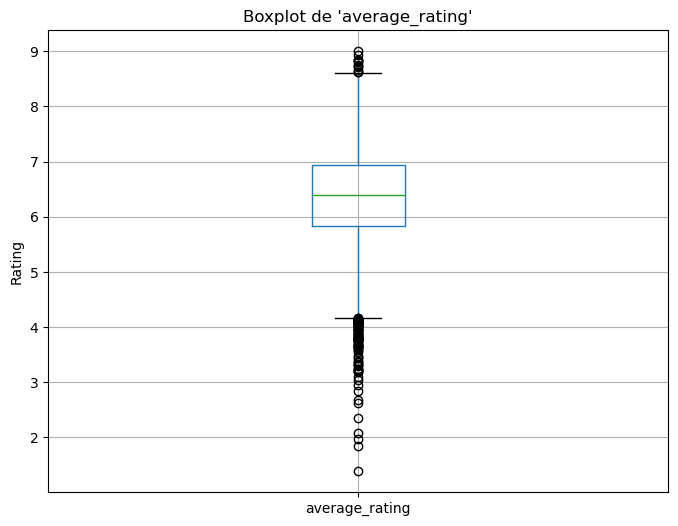

In [11]:
# Boxplot "average_rating"
plt.figure(figsize=(8, 6))
df_games.boxplot(column="average_rating")
plt.title("Boxplot de 'average_rating'")
plt.ylabel("Rating")
plt.show()

Despues de haber realizado una revision de nuestra columna "average_rating" podemos identificar los top 5 "average rated" games los cuales podemos observar en el cuadro y el grafico siguiente.

Visualization: Se eligió un gráfico de barras horizontal porque permite una fácil comparación entre pocos elementos (en este caso, los top 5 "average rated" games). La orientación horizontal nos ayuda a que los nombres de los juegos pueden ser más largos sin superponerse o cortarse.

Colores: Se utilizaron diferentes colores para cada barra para hacerlas distintas. Esta es una elección más estética, pero puede hacer que la visualización sea más atractiva y facil de entender.

Etiquetado: Mostrar la calificación promedio real dentro de cada barra proporciona un valor claro y preciso para cada juego, permitiendo entender las calificaciones exactas sin tener que estimar basándose en la longitud de la barra ya que hay barras que son casi del mismo tamano.

Data Table with the top 5 games with “average rating” are:
                                                 name  average_rating
8348                     Small World Designer Edition         9.00392
6392                           Kingdom Death: Monster         8.93184
9964                           Terra Mystica: Big Box         8.84862
8526                          Last Chance for Victory         8.84603
9675  The Greatest Day: Sword, Juno, and Gold Beaches         8.83081


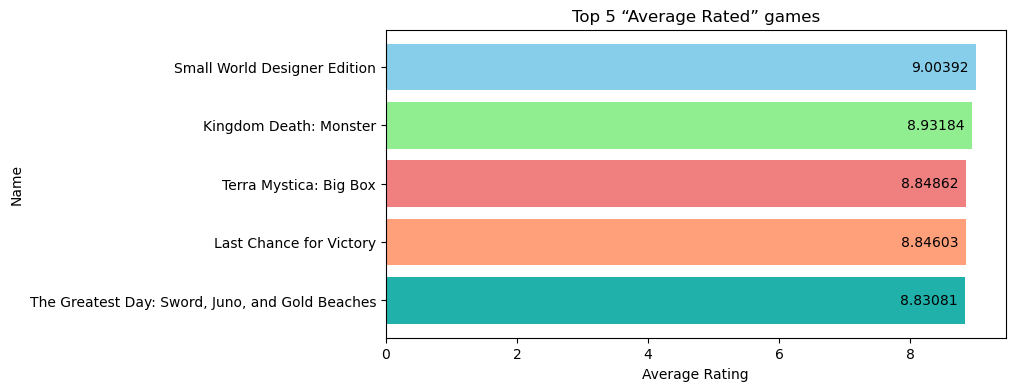

In [12]:
# Top 5 “average rated” games
df_games_top_5 = df_games[['name', 'average_rating']]

df_games_top_5 = df_games_top_5.sort_values(by='average_rating', ascending=False)

top_5 = df_games_top_5.head(5)

print("Data Table with the top 5 games with “average rating” are:")
print(top_5)

# Visualization
plt.figure(figsize=(8, 4))  
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen'] 

bars = plt.barh(top_5['name'], top_5['average_rating'], color=colors)  

for bar, rating in zip(bars, top_5['average_rating']):
    plt.text(bar.get_width() - 0.99, bar.get_y() + bar.get_height() / 2, f'{rating}', va='center')

plt.xlabel('Average Rating')
plt.ylabel('Name')
plt.title('Top 5 “Average Rated” games')
plt.gca().invert_yaxis()
plt.show()

### Is there a correlation between the “users_rated” and the “max_playtime”?

La correlación entre estas dos variables, según el coeficiente de Pearson, es aproximadamente −0.0043.

Esto nos indica que prácticamente no hay correlación entre las dos variables. En otras palabras, el número de usuarios que calificaron un juego no está relacionado con el tiempo máximo recomendado para jugar ese juego.

En este caso se eligió un gráfico de dispersión (scatter plot) porque es adecuado para visualizar la relación entre dos variables numéricas.

Se usó un alfa (transparencia) ligeramente reducido para los puntos para ayudar a visualizar áreas donde los puntos se superponen, lo que puede indicar una densidad mayor de datos en esa región.

Ademas agregue un cuadro con la correlacion dentro del grafico para poder mejorar visualizacion.

Tambien agregue una "línea de regresión" de color rojo para visualizar mejor la tendencia general ya que tenemos muchas superposiciones de puntos, lo cual podemos observar que la tendencia general de los puntos esta cercana a cero, lo que se confirma con el coeficiente de correlación cercano a cero −0.0043

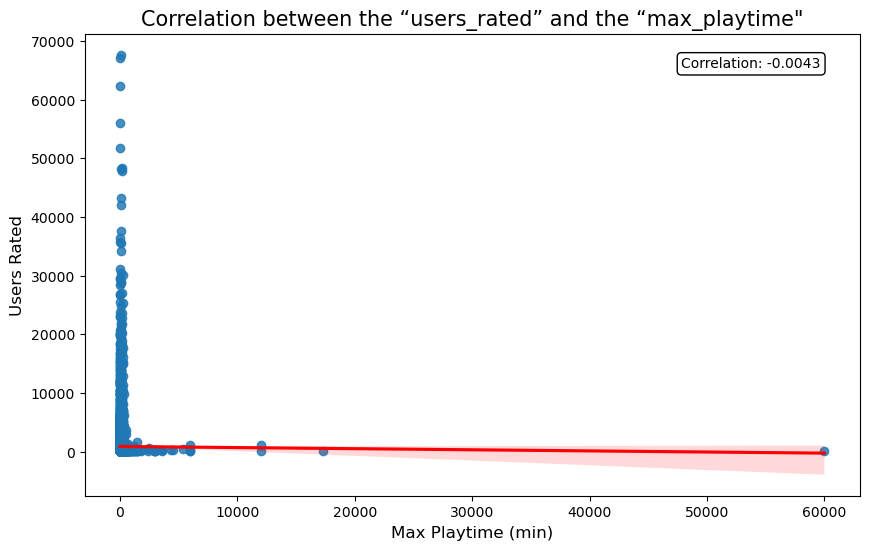

In [13]:
# Correlation between the “users_rated” and the “max_playtime
correlation = df_games['users_rated'].corr(df_games['max_playtime'])

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_games['max_playtime'], y=df_games['users_rated'], alpha=0.1)
sns.regplot(x=df_games['max_playtime'], y=df_games['users_rated'], line_kws={"color": "red"})
plt.text(x=0.95, y=0.95, s=f'Correlation: {correlation:.4f}', transform=plt.gca().transAxes, 
         ha='right', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
plt.title('Correlation between the “users_rated” and the “max_playtime"', fontsize=15)
plt.xlabel('Max Playtime (min)', fontsize=12)
plt.ylabel('Users Rated', fontsize=12)
plt.show()

### What is the distribution of game categories? (You may not use a barchart)

Para poder saber cual es la distribucion de las categorias de los juegos primero debemos analizar la columna "category" y revisar si existen datos nulos y limpiar de forma apropiada la columna.

Ire explicando paso a paso la limpieza de esta columna, la cual se dividira en los siguientes pasos:

1.- Verificacion y limpieza de datos Nulos.

2.- Basic Text Feature Extraction

3.- Basic Text Pre-processing

4.- Advance Text Processing

#### Verification and cleaning of Null data

In [14]:
print(df_games["category"].head())

0    Economic,Negotiation,Political
1                 Card Game,Fantasy
2        Abstract Strategy,Medieval
3                           Ancient
4                          Economic
Name: category, dtype: object


Podemos observar que hay 94 nulos (NaN) dentro de nuestra columna "category" los cuales no son muchos ya que representan el 0.89% (94 / 10532) de nuestra data.

En este caso con la funcion df_games["category"].fillna("Unknown", inplace=True)  vamos a reemplazar los nulos por "Unknown" ya que si los eliminamos se eliminaria la fila completa y pueden haber otros datos de importancia para nuestro analisis.

In [15]:
# Check the number of null values in the "category" column
null_count_category = df_games["category"].isnull().sum()

null_count_category

94

In [16]:
df_games["category"].fillna("Unknown", inplace=True)

#### Basic Text Feature Extraction ("category") column

##### Number of Words

Dentro de la columna "category" estan las categorias de los juegos separados por coma y lo que realizamos es contar el numero de palabras dentro de cada fila.

Como podemos ver, dentro de una categoria nos cuenta solo 1 palabra ya que esta unida por coma lo cual ya identificamos un problema, el cual resolveremos mas adelante.

In [17]:
# Number of Words
df_games['word_count'] = df_games["category"].apply(lambda x: len(str(x).split(" "))) 
df_games[["category",'word_count']].head()

,category,word_count
0,"Economic,Negotiation,Political",1
1,"Card Game,Fantasy",2
2,"Abstract Strategy,Medieval",2
3,Ancient,1
4,Economic,1


##### Number of characters

Con la siguiente funcion calculamos el número de caracteres de cada categoria

In [18]:
# Number of characters
df_games['char_count'] = df_games['category'].str.len() 
df_games[['category','char_count']].head()

,category,char_count
0,"Economic,Negotiation,Political",30
1,"Card Game,Fantasy",17
2,"Abstract Strategy,Medieval",26
3,Ancient,7
4,Economic,8


##### Average Word Length

Aqui extraeremos otra función que calculará la longitud promedio de las palabras de cada categoria.

In [19]:
# Average Word Length
def avg_word(sentence): 
    words = sentence.split() 
    return (sum(len(word) for word in words)/len(words)) if words else 0 

df_games['avg_word'] = df_games['category'].apply(lambda x: avg_word(x)) 
df_games[['category','avg_word']].head()

,category,avg_word
0,"Economic,Negotiation,Political",30.0
1,"Card Game,Fantasy",8.0
2,"Abstract Strategy,Medieval",12.5
3,Ancient,7.0
4,Economic,8.0


##### Number of stopwords

Aqui vamos calcular el número de palabras vacías, lo cual también puede darnos información adicional que podríamos haber estado perdiendo antes.

In [20]:
# Number of stopwords
import nltk 

from nltk.corpus import stopwords 
stop = stopwords.words('english') 
df_games['stopwords'] = df_games['category'].apply(lambda x: len([x for x in x.split() if x in stop])) 
df_games[['category','stopwords']].head()

,category,stopwords
0,"Economic,Negotiation,Political",0
1,"Card Game,Fantasy",0
2,"Abstract Strategy,Medieval",0
3,Ancient,0
4,Economic,0


##### Number of special characters and Extract of special characters

Aqui vamos a contar y extraer el numero de caracteres espaciales que se encuentran dentro de nuestra columma "category"

In [21]:
# Number of special characters

# Función para contar el número de caracteres especiales en un texto
def count_special_characters(text):
    # Contando caracteres que no son alfabéticos, numéricos o espacios
    return len([char for char in text if not char.isalnum() and not char.isspace()])

# Aplicando la función a la columna "description"
df_games['special_characters_count'] = df_games['category'].apply(count_special_characters)

# Mostrando las primeras filas del dataframe con la nueva columna
df_games[['category', 'special_characters_count']].head()

,category,special_characters_count
0,"Economic,Negotiation,Political",2
1,"Card Game,Fantasy",1
2,"Abstract Strategy,Medieval",1
3,Ancient,0
4,Economic,0


In [22]:
# Extract of special characters

# Función para extraer los caracteres especiales de un texto
def extract_special_characters(text):
    return "".join([char for char in text if not char.isalnum() and not char.isspace()])

# Aplicando la función a la columna "description"
df_games['special_characters'] = df_games['category'].apply(extract_special_characters)

# Mostrando las primeras filas del dataframe con la nueva columna
df_games[['category', 'special_characters']].head()

,category,special_characters
0,"Economic,Negotiation,Political",",,"
1,"Card Game,Fantasy",","
2,"Abstract Strategy,Medieval",","
3,Ancient,
4,Economic,


##### Number of numerics

Aqui calculamos la cantidad de numeros que se encuentren dentro de cada categoria.

In [23]:
# Number of numerics
df_games['numerics'] = df_games['category'].apply(lambda x: len([x for x in x.split() if x.isdigit()])) 
df_games[['category','numerics']].head() 

,category,numerics
0,"Economic,Negotiation,Political",0
1,"Card Game,Fantasy",0
2,"Abstract Strategy,Medieval",0
3,Ancient,0
4,Economic,0


##### Number of Uppercase words

Aqui vamos a contar la cantidad de palabras en mayuscula, lo cual nos sirve para identificar si existen algunas categorias que se encuentren en mayuscula.

In [24]:
# Number of Uppercase words
df_games['upper'] = df_games['category'].apply(lambda x: len([x for x in x.split() if x.isupper()])) 
df_games[['category','upper']].head() 

,category,upper
0,"Economic,Negotiation,Political",0
1,"Card Game,Fantasy",0
2,"Abstract Strategy,Medieval",0
3,Ancient,0
4,Economic,0


#### Basic Text Pre-processing ("category") column

Despues de haber extraido algunas caracteristicas de nuestra colummna "category" vamos a limpiar los datos para poder obtener mejores resultados para nuestro analisis.

##### Lower case

El primer paso de preprocesamiento que haremos será transformar nuestras categorias a minúsculas. Esto evita tener múltiples copias de las mismas palabras. Por ejemplo, al calcular el recuento de palabras, "Game" y "game" se tomarán como palabras diferentes.

In [25]:
# Lower case
df_games['category'] = df_games['category'].apply(lambda x: " ".join(x.lower() for x in x.split())) 
df_games['category'].head()

0    economic,negotiation,political
1                 card game,fantasy
2        abstract strategy,medieval
3                           ancient
4                          economic
Name: category, dtype: object

##### Removing Punctuation, special characters & replace with space

Aqui eliminaremos las puntuaciones y caracteres especiales que se encuentren dentro de nuestra columna "category" y las reemplazaremos por un espacio, de esta forma podremos definir cada categoria de forma mas clara.

In [26]:
# Removing Punctuation, special characters & replace with space
df_games['category'] = df_games['category'].str.replace('[^\w\s]',' ') 
df_games['category'].head()

0    economic negotiation political
1                 card game fantasy
2        abstract strategy medieval
3                           ancient
4                          economic
Name: category, dtype: object

##### Removal of Stop Words

Aqui vamos a remover el numero de caracteres espaciales que se encuentran dentro de nuestra columma "category"

In [27]:
# Removal of Stop Words
from nltk.corpus import stopwords 
stop = stopwords.words('english') 
df_games['category'] = df_games['category'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 
df_games['category'].head() 

0    economic negotiation political
1                 card game fantasy
2        abstract strategy medieval
3                           ancient
4                          economic
Name: category, dtype: object

##### Common word

Aqui vamos a verificar las 20 palabras que aparecen con más frecuencia en nuestros datos de texto y luego revisaremos si es o no conveniente eliminarlas

In [28]:
# Common word
freq = pd.Series(' '.join(df_games['category']).split()).value_counts()[:20] 
freq

game        4924
card        2981
wargame     2034
fantasy     1218
war         1052
fighting     900
economic     878
science      850
fiction      850
dice         838
party        833
world        793
abstract     710
strategy     710
children     704
ii           676
bluffing     655
theme        630
humor        580
building     574
dtype: int64

En este caso en particular no vamos a remover las palabras mas comunes ya que puede afectar a la identificacion de las categorias.

##### Rare words

Al igual que el paso anterior aqui vamos a verificar las 20 palabras que aparecen con menos frecuencia en nuestros datos de texto y luego revisaremos si es o no conveniente eliminarlas

In [29]:
# Rare words
freq = pd.Series(' '.join(df_games['category']).split()).value_counts()[-20:] 
freq

number           78
environmental    70
religious        65
arabian          57
adult            50
mature           50
math             48
post             41
music            36
revolutionary    36
medical          31
vietnam          29
pike             27
shot             27
system           22
wars             15
indian           15
korean           14
expansion        11
base             11
dtype: int64

En este caso en particular no vamos a remover las palabras mas raras ya que puede afectar a la identificacion de las categorias

##### Spelling correction

Otro paso dentro del proceso y limpieza de texto es la correccion ortografica.

Este paso es útil porque también nos ayudará a reducir múltiples copias de palabras. Por ejemplo, “Analytics” y “analytcs” se tratarán como palabras diferentes incluso si se usan en el mismo sentido.

La corrección ortográfica puede ser un proceso que requiere muchos recursos y nos puede llevar tiempo ya que nuestro Data Frame es grande. 

Además, la corrección ortográfica de TextBlob está basada en palabras en inglés, por lo que puede no ser perfecta, especialmente en este caso que estamos trabajando con categorias que pueden tener una ortografia especial.

De todas formas el codigo seria de la siguiente forma:

from textblob import TextBlob


def correct_spelling(text):
    return TextBlob(text).correct()


df_games['corrected_category'] = df_games['category'].apply(correct_spelling)


df_games[['category', 'corrected_category']].head()

##### Tokenization

La tokenización es el proceso de convertir una cadena de texto o un documento en tokens, que son generalmente palabras individuales.

Al tokenizar la columna "category", podemos identificar y analizar categorías individuales en lugar de conjuntos de categorías. Esto es especialmente útil si una fila contiene múltiples categorías separadas por comas o espacios.

In [30]:
# Tokenization
import pandas as pd
from textblob import TextBlob

def tokenize_category(category):
    return TextBlob(category).words

df_games['tokenized_category'] = df_games['category'].apply(tokenize_category)

df_games[['category', 'tokenized_category']].head()

,category,tokenized_category
0,economic negotiation political,"[economic, negotiation, political]"
1,card game fantasy,"[card, game, fantasy]"
2,abstract strategy medieval,"[abstract, strategy, medieval]"
3,ancient,[ancient]
4,economic,[economic]


##### Lemmatization

La lematización es el proceso de convertir una palabra a su forma base o raíz. Es similar a la derivación (stemming), pero mientras que la derivación a menudo recorta palabras para llegar a la raíz, la lematización utiliza un vocabulario y un análisis morfológico para obtener la forma base de la palabra. Por ejemplo, "gamers" podría ser lematizado a "game" o "economical" a "economic".

En este caso como queremos clasificar o agrupar juegos basados en sus categorías, la lematización ayuda a que el proceso sea más preciso al reducir la variabilidad en la representación de las categorías.

In [31]:
# Lemmatization
from textblob import Word 

# Applying Lematization to token lists
df_games['lemmatized_category'] = df_games['tokenized_category'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

df_games['lemmatized_category'].head()

0    economic negotiation political
1                 card game fantasy
2        abstract strategy medieval
3                           ancient
4                          economic
Name: lemmatized_category, dtype: object

#### Advance Text Processing ("category") column

Ahora que ya hemos limpiado nuestra columna "category" y hemos realizado la tokenizacion y lemmatizacion dejando una nueva columna limpia y procesada, llamada "lemmatized_category", voy a vectorizar la columna "lemmatized_category" a traves de 3 modelos distintos, para asi poder comparar los resultados y posteriormente elegir el modelo que mejor represanta las categorias y su distribucion.

Los modelos que voy a utilizar son:

1.- Bag of Words (BoW)

2.- TF-IDF ("Term Frequency-Inverse Document Frequency")

3.- N-grams

##### Bag of Words (BoW)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer
vectorizer = CountVectorizer()

# Transform the data as type "str"
bow_matrix = vectorizer.fit_transform(df_games['lemmatized_category'].astype('str'))

# Convert the BoW matrix to a dataframe
df_bow = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

df_bow.head()

,abstract,action,adult,adventure,age,agent,american,ancient,animal,arabian,...,unknown,video,vietnam,war,warfare,wargame,west,word,world,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Sum df_bow
category_counts = df_bow.sum().sort_values(ascending=False)
category_counts.head()

game       4924
card       2981
wargame    2034
fantasy    1218
war        1067
dtype: int64

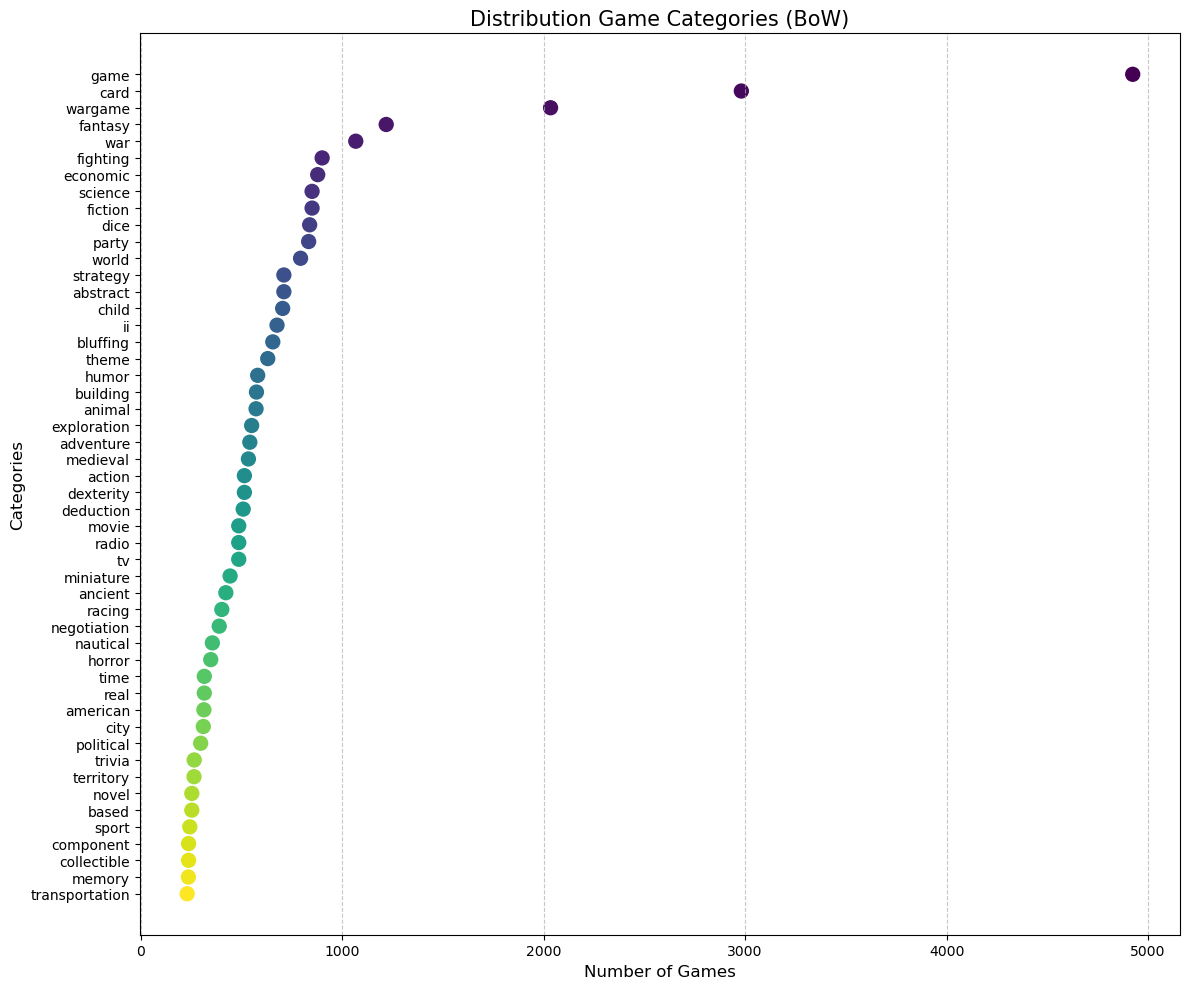

In [42]:
# Distribution of top categories based on BoW
top_categories = category_counts.head(50)
sorted_counts = np.sort(top_categories.values)
sorted_categories = top_categories.index[top_categories.values.argsort()]

# Colors based from darkest with highest value to lightest with lowest value
colors = plt.cm.viridis(np.linspace(1, 0, len(sorted_counts)))

# Scatter Plot
plt.figure(figsize=(12, 10))
plt.scatter(sorted_counts, sorted_categories, color=colors, s=100)
plt.title('Distribution Game Categories (BoW)', fontsize=15)
plt.xlabel('Number of Games', fontsize=12)
plt.ylabel('Categories', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### TF-IDF

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the data as type "str"
tfidf_matrix = tfidf_vectorizer.fit_transform(df_games['lemmatized_category'].astype('str'))

# Convert the TF-IDF matrix to a dataframe
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

df_tfidf.head()

,abstract,action,adult,adventure,age,agent,american,ancient,animal,arabian,...,unknown,video,vietnam,war,warfare,wargame,west,word,world,zombie
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.562558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Sum df_tfidf
tfidf_distribution = df_tfidf.sum().sort_values(ascending=False)
tfidf_distribution.head()

game        1443.983805
card        1146.391690
wargame      775.267957
fantasy      583.688179
economic     465.608017
dtype: float64

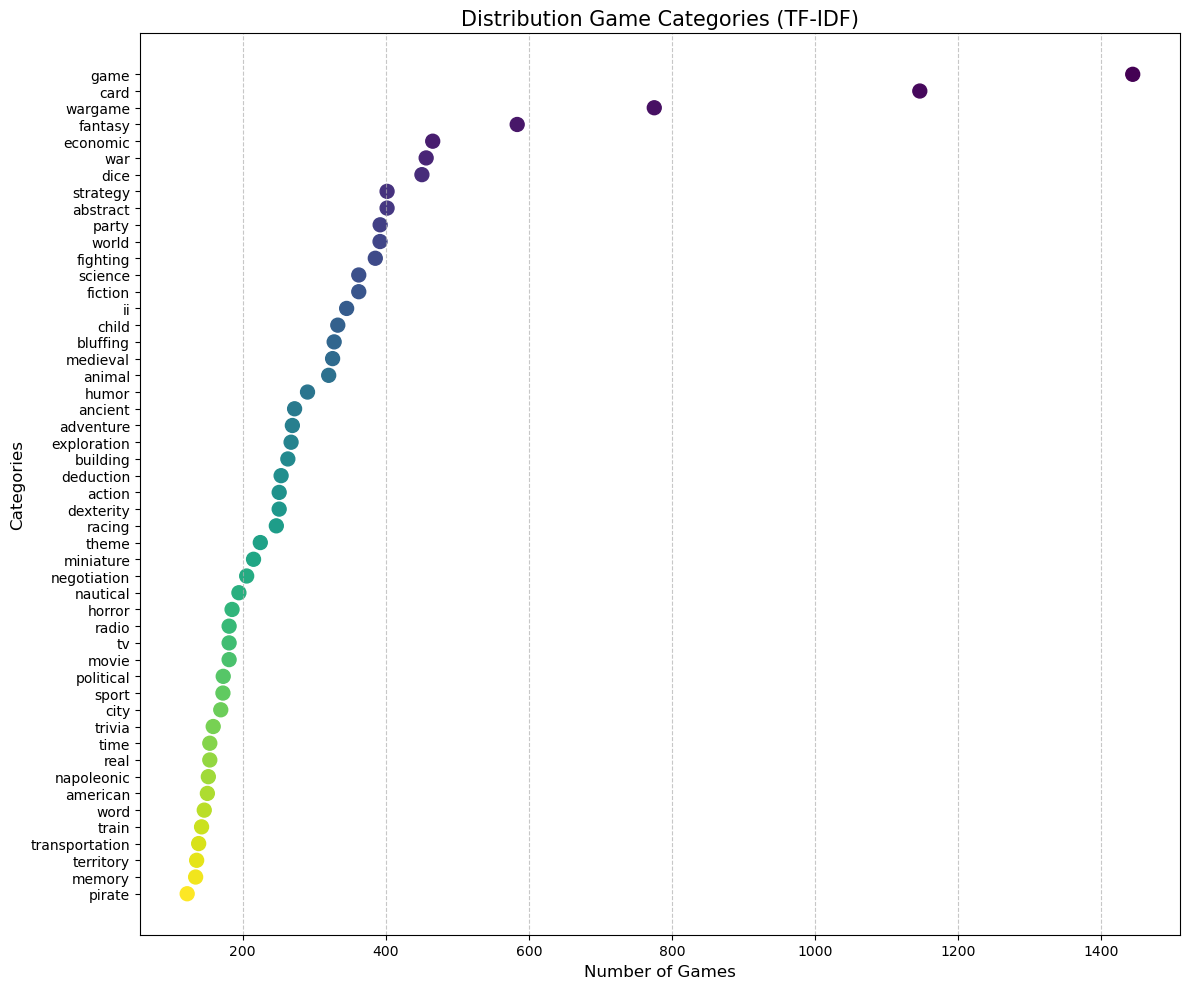

In [47]:
# Distribution of top categories based on TF-IDF
top_tfidf_categories = tfidf_distribution.head(50)
sorted_counts_tfidf = np.sort(top_tfidf_categories.values)
sorted_categories_tfidf = top_tfidf_categories.index[top_tfidf_categories.values.argsort()]

# Colors based from darkest with highest value to lightest with lowest value
colors = plt.cm.viridis(np.linspace(1, 0, len(sorted_counts_tfidf)))

plt.figure(figsize=(12, 10))
plt.scatter(sorted_counts_tfidf, sorted_categories_tfidf, color=colors, s=100)
plt.title('Distribution Game Categories (TF-IDF)', fontsize=15)
plt.xlabel('Number of Games', fontsize=12)
plt.ylabel('Categories', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### N-grams

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer 4-grams
ngram_vectorizer = CountVectorizer(ngram_range=(4, 4))

# Transform the data as type "str"
ngram_matrix = ngram_vectorizer.fit_transform(df_games['lemmatized_category'].astype('str'))

# Convert the N-grams matrix to a dataframe
df_ngram = pd.DataFrame(ngram_matrix.toarray(), columns=ngram_vectorizer.get_feature_names_out())

df_ngram.head()

,abstract strategy action dexterity,abstract strategy adventure dice,abstract strategy adventure economic,abstract strategy american west,abstract strategy ancient arabian,abstract strategy ancient city,abstract strategy ancient civilization,abstract strategy ancient dice,abstract strategy ancient game,abstract strategy ancient mythology,...,west economic negotiation transportation,west economic territory building,west economic train transportation,west exploration fighting horror,west fantasy fighting horror,west farming humor political,west fighting horror miniature,west fighting miniature wargame,west post napoleonic wargame,world war world war
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Sum df_ngram
ngram_counts = df_ngram.sum().sort_values(ascending=False)
ngram_counts.head()

wargame world war ii               634
movie tv radio theme               486
card game collectible component    144
card game child game               140
action dexterity child game        128
dtype: int64

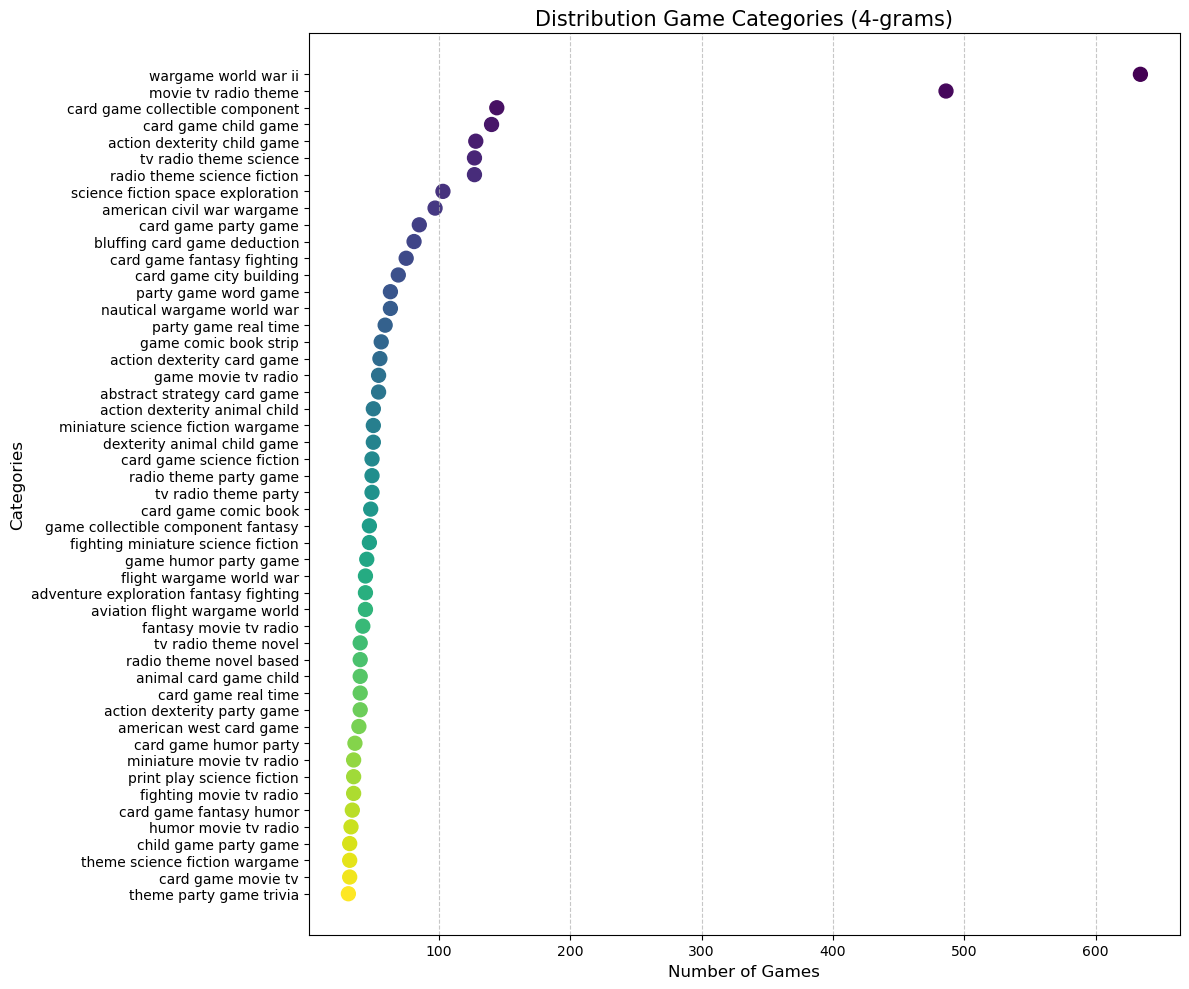

In [51]:
# Distribution of top categories based on 4-grams
top_ngram_categories = ngram_counts.head(50)
sorted_counts_ngram = np.sort(top_ngram_categories.values)
sorted_categories_ngram = top_ngram_categories.index[top_ngram_categories.values.argsort()]

# Colors based from darkest with highest value to lightest with lowest value
colors = plt.cm.viridis(np.linspace(1, 0, len(sorted_counts_ngram)))  

plt.figure(figsize=(12, 10))
plt.scatter(sorted_counts_ngram, sorted_categories_ngram, color=colors, s=100)
plt.title('Distribution Game Categories (4-grams)', fontsize=15)
plt.xlabel('Number of Games', fontsize=12)
plt.ylabel('Categories', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Despues de haber vectorizado la columna "lemmatized_category" a traves de los tres modelos podemos observar lo siguiente:



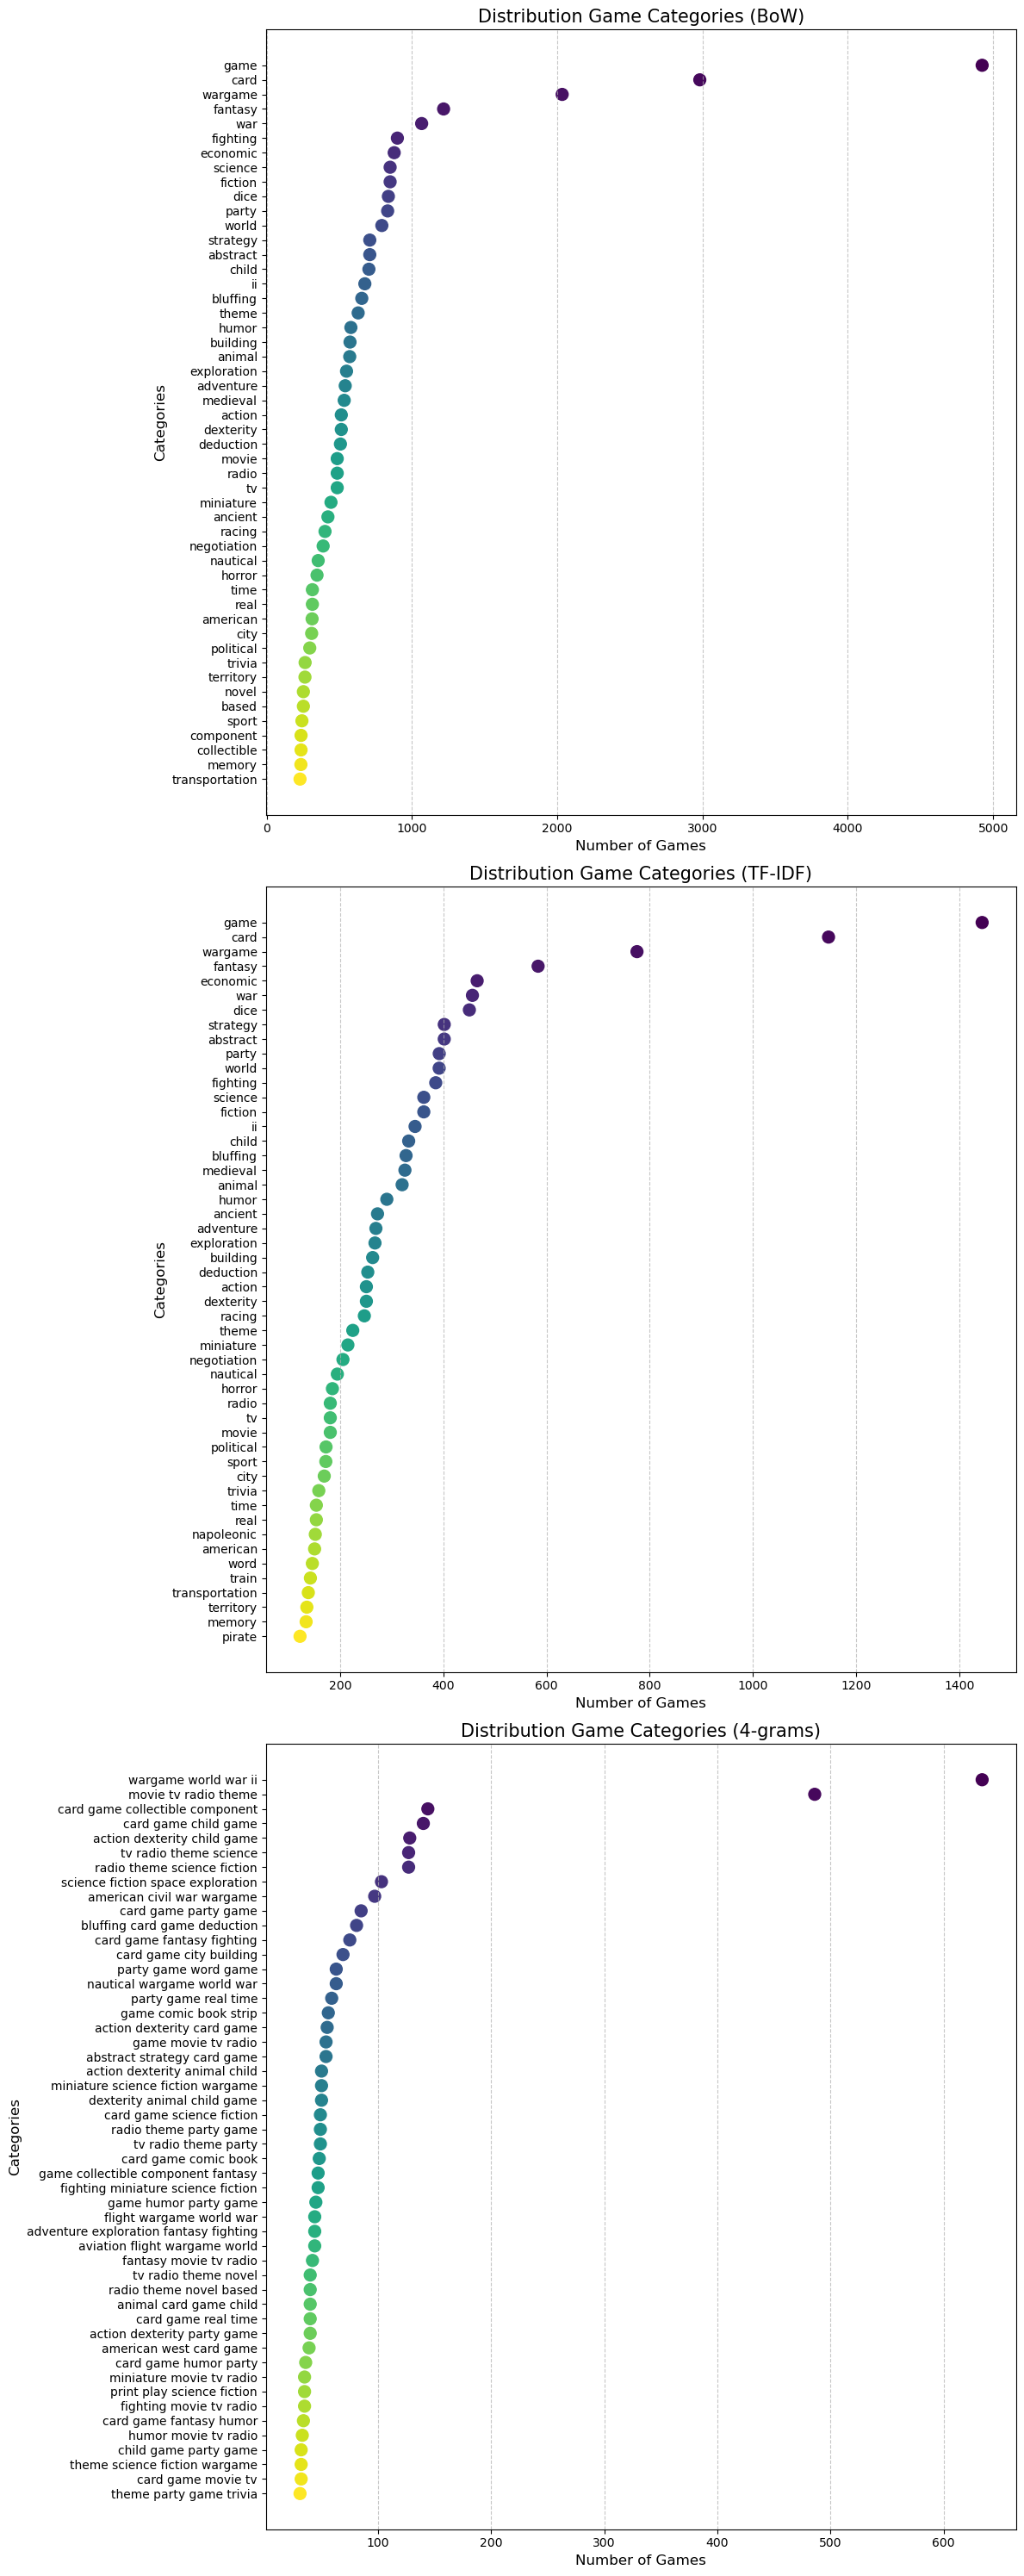

In [54]:
# Setting up the figure and axes
fig, axarr = plt.subplots(3, 1, figsize=(12, 30))

# Colors for the scatter plots
colors = plt.cm.viridis(np.linspace(1, 0, 50))

# Scatter plot for BoW
axarr[0].scatter(sorted_counts, sorted_categories, color=colors, s=100)
axarr[0].set_title('Distribution Game Categories (BoW)', fontsize=15)
axarr[0].set_xlabel('Number of Games', fontsize=12)
axarr[0].set_ylabel('Categories', fontsize=12)
axarr[0].grid(axis='x', linestyle='--', alpha=0.7)

# Scatter plot for TF-IDF
axarr[1].scatter(sorted_counts_tfidf, sorted_categories_tfidf, color=colors, s=100)
axarr[1].set_title('Distribution Game Categories (TF-IDF)', fontsize=15)
axarr[1].set_xlabel('Number of Games', fontsize=12)
axarr[1].set_ylabel('Categories', fontsize=12)
axarr[1].grid(axis='x', linestyle='--', alpha=0.7)

# Scatter plot for 4-grams
axarr[2].scatter(sorted_counts_ngram, sorted_categories_ngram, color=colors, s=100)
axarr[2].set_title('Distribution Game Categories (4-grams)', fontsize=15)
axarr[2].set_xlabel('Number of Games', fontsize=12)
axarr[2].set_ylabel('Categories', fontsize=12)
axarr[2].grid(axis='x', linestyle='--', alpha=0.7)

# Adjust the layout
plt.tight_layout()
plt.show()

### Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?

In [52]:
# Dividimos el dataframe en dos grupos: juegos antiguos (1992 y anteriores) y juegos nuevos (después de 1992)
older_games = df_games[df_games['year_published'] <= 1992]
newer_games = df_games[df_games['year_published'] > 1992]

# Calculamos la mediana de la calificación promedio para cada grupo
median_rating_older = older_games['average_rating'].median()
median_rating_newer = newer_games['average_rating'].median()

median_rating_older, median_rating_newer

(6.08812, 6.462915)

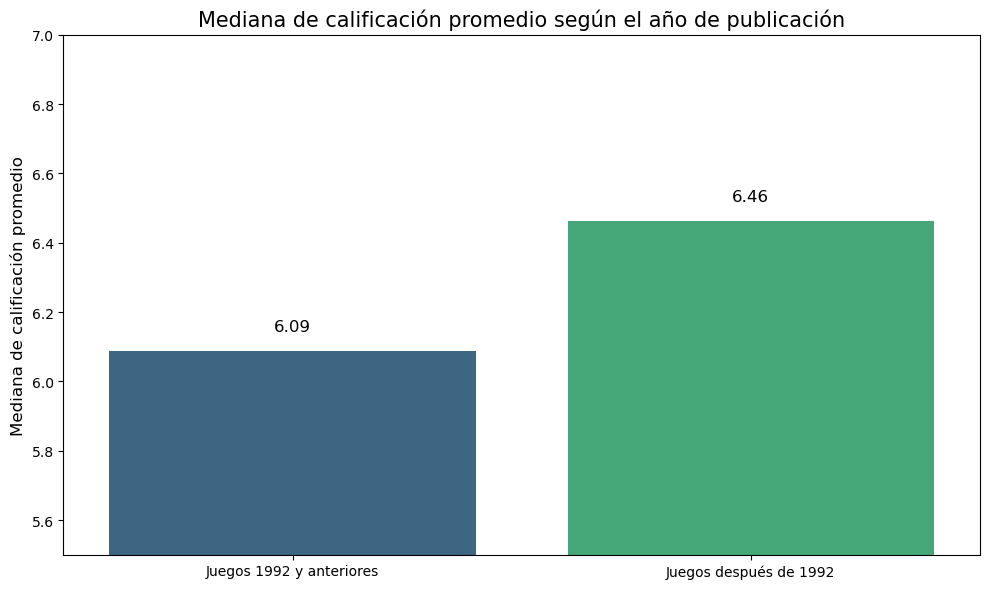

In [53]:
# Visualización de las medianas de calificación promedio para juegos antiguos y nuevos
labels = ['Juegos 1992 y anteriores', 'Juegos después de 1992']
medians = [median_rating_older, median_rating_newer]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=medians, palette='viridis')
plt.title('Mediana de calificación promedio según el año de publicación', fontsize=15)
plt.ylabel('Mediana de calificación promedio', fontsize=12)
plt.ylim(5.5, 7)

# Mostrar las medianas exactas en las barras
for i, v in enumerate(medians):
    plt.text(i, v + 0.05, "{:.2f}".format(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### What are the 5 most common “mechanics” in the dataset?

#### Basic Text Feature Extraction ("mechanic") column

In [ ]:
print(df_games["mechanic"].head(20))

In [ ]:
# Verificar la cantidad de valores nulos en la columna "category"
null_count_mechanic = df_games["mechanic"].isnull().sum()

null_count_mechanic

In [ ]:
df_games["mechanic"].fillna("Unknown", inplace=True)

In [ ]:
# Number of Words
df_games['word_count'] = df_games["mechanic"].apply(lambda x: len(str(x).split(" "))) 
df_games[["mechanic",'word_count']].head()

In [ ]:
# Number of characters
df_games['char_count'] = df_games['mechanic'].str.len() 
df_games[['mechanic','char_count']].head()

In [ ]:
# Average Word Length
def avg_word(sentence): 
    words = sentence.split() 
    return (sum(len(word) for word in words)/len(words)) if words else 0 

df_games['avg_word'] = df_games['mechanic'].apply(lambda x: avg_word(x)) 
df_games[['mechanic','avg_word']].head()

In [ ]:
# Number of stopwords
import nltk 

from nltk.corpus import stopwords 
stop = stopwords.words('english') 
df_games['stopwords'] = df_games['mechanic'].apply(lambda x: len([x for x in x.split() if x in stop])) 
df_games[['mechanic','stopwords']].head()

In [ ]:
# Number of special characters

# Función para contar el número de caracteres especiales en un texto
def count_special_characters(text):
    # Contando caracteres que no son alfabéticos, numéricos o espacios
    return len([char for char in text if not char.isalnum() and not char.isspace()])

# Aplicando la función a la columna "description"
df_games['special_characters_count'] = df_games['mechanic'].apply(count_special_characters)

# Mostrando las primeras filas del dataframe con la nueva columna
df_games[['mechanic', 'special_characters_count']].head()

In [ ]:
# Extract of special characters

# Función para extraer los caracteres especiales de un texto
def extract_special_characters(text):
    return "".join([char for char in text if not char.isalnum() and not char.isspace()])

# Aplicando la función a la columna "description"
df_games['special_characters'] = df_games['mechanic'].apply(extract_special_characters)

# Mostrando las primeras filas del dataframe con la nueva columna
df_games[['mechanic', 'special_characters']].head()

In [ ]:
# Number of numerics

df_games['numerics'] = df_games['mechanic'].apply(lambda x: len([x for x in x.split() if x.isdigit()])) 
df_games[['mechanic','numerics']].head() 

In [ ]:
# Number of Uppercase words

df_games['upper'] = df_games['mechanic'].apply(lambda x: len([x for x in x.split() if x.isupper()])) 
df_games[['mechanic','upper']].head() 

#### Basic Text Pre-processing ("mechanic") column

Tokenización: Estás dividiendo la columna "mechanic" en listas de mecánicas usando comas como delimitador. Esto es correcto, ya que las mecánicas están separadas por comas en tu dataset.


Conversión a minúsculas y eliminacion de espacios adicionales: Estás convirtiendo cada mecánica a minúsculas y eliminando espacios adicionales al principio y al final. Este paso es esencial para garantizar la uniformidad en el análisis posterior.


Eliminación de stopwords: Estás utilizando la lista de palabras vacías de nltk para eliminar palabras comunes que podrían no ser relevantes para tu análisis. Si bien las stopwords son típicamente palabras comunes en lenguaje natural (como "and", "the", "is", etc.), en este contexto específico de mecánicas de juegos de mesa, es poco probable que las stopwords sean un problema. Por lo tanto, podrías considerar si este paso es realmente necesario.


Lematización: Estás utilizando el WordNetLemmatizer de nltk para lematizar las mecánicas. Este paso convertirá palabras a su forma base, lo cual es útil, aunque debes tener en cuenta que la lematización depende del contexto y podría no ser siempre perfecta. Sin embargo, es un buen paso para reducir la dimensionalidad de tus datos.

In [ ]:
# Lower case
df_games['mechanic'] = df_games['mechanic'].apply(lambda x: " ".join(x.lower() for x in x.split())) 
df_games['mechanic'].head()

In [ ]:
# Removing Punctuation & special characters
df_games['mechanic'] = df_games['mechanic'].str.replace('[^\w\s]',' ') 
df_games['mechanic'].head()

In [ ]:
# Removal of Stop Words
from nltk.corpus import stopwords 
stop = stopwords.words('english') 
df_games['mechanic'] = df_games['mechanic'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 
df_games['mechanic'].head() 

In [ ]:
# Common word
freq = pd.Series(' '.join(df_games['mechanic']).split()).value_counts()[:20] 
freq

Aqui no vamos a remover las palabras mas comunes ya que puede afectar a la identificacion de las mecanicas

Common word removal
freq = list(freq.index) 
df_games['description'] = df_games['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq)) 
df_games['description'].head() 

In [ ]:
# Rare words
freq = pd.Series(' '.join(df_games['mechanic']).split()).value_counts()[-20:] 
freq

Aqui no vamos a remover las palabras mas raras ya que puede afectar a la identificacion de las mecanicas

Rare words removal
freq = list(freq.index) 
df_games['description'] = df_games['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq)) 
df_games['description'].head()

In [ ]:
# Tokenization
import pandas as pd
from textblob import TextBlob

# Función para tokenizar una descripción usando TextBlob
def tokenize_mechanic(mechanic):
    return TextBlob(mechanic).words

# Aplicando la tokenización a las primeras descripciones
df_games['tokenized_mechanic'] = df_games['mechanic'].apply(tokenize_category)

# Mostrando las primeras filas del dataframe con las descripciones originales y tokenizadas
df_games[['mechanic', 'tokenized_mechanic']].head()

In [ ]:
# Lemmatization
from textblob import Word 

# Aplicando la lematización a las listas de tokens
df_games['lemmatized_mechanic'] = df_games['tokenized_mechanic'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

# Para visualizar el resultado
df_games['lemmatized_mechanic'].head()

#### Advance Text Processing ("mechanic") column

##### Bag of Words (BoW)

Primero, necesitas convertir la columna tokenizada de nuevo a texto. Esto se debe a que CountVectorizer espera datos en formato de cadena.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Crear una instancia de CountVectorizer
vectorizer = CountVectorizer()

# Ajustar el vectorizador y transformar los datos
bow_matrix = vectorizer.fit_transform(df_games['lemmatized_mechanic'].astype('str'))

# Convertir la matriz BoW en un dataframe
df_bow = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Mostrar las primeras filas del dataframe BoW
df_bow.head()

In [ ]:
# Sumar las columnas del dataframe
mechanic_counts = df_bow.sum(axis=0)

# Ordenar los resultados de mayor a menor
sorted_mechanic_counts = mechanic_counts.sort_values(ascending=False).head(5)

# Mostrar los resultados
print(sorted_mechanic_counts)

In [ ]:
# Plotting the top 5 for BoW
plt.figure(figsize=(10,6))
sorted_mechanic_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 terms using Bag of Words')
plt.ylabel('Counts')
plt.xlabel('Terms')
plt.xticks(rotation=45)
plt.show()

##### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear una instancia de TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Ajustar el vectorizador y transformar los datos
tfidf_matrix = tfidf_vectorizer.fit_transform(df_games['lemmatized_mechanic'].astype('str'))

# Convertir la matriz TF-IDF en un dataframe
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Mostrar las primeras filas del dataframe TF-IDF
df_tfidf.head()

In [ ]:
# Sumar las columnas para obtener la importancia total de cada categoría
tfidf_top_5_mechanic = df_tfidf.sum().sort_values(ascending=False)
tfidf_top_5_mechanic.head(5)

In [ ]:
# Obtener los top 5
mechanic_top_5 = tfidf_top_5_mechanic.head(5)

# Crear el gráfico
plt.figure(figsize=(10,6))
mechanic_top_5.plot(kind='bar', color='skyblue')
plt.title('Top 5 Mecánicas de Juego Más Populares')
plt.ylabel('Cantidad de Juegos')
plt.xlabel('Mecánica de Juego')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### n-grams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Crear una instancia de CountVectorizer para unigramas y bigramas
ngram_vectorizer = CountVectorizer(ngram_range=(2, 2))

# Ajustar el vectorizador y transformar los datos
ngram_matrix = ngram_vectorizer.fit_transform(df_games['lemmatized_mechanic'].astype('str'))

# Convertir la matriz n-gram en un dataframe
df_ngram = pd.DataFrame(ngram_matrix.toarray(), columns=ngram_vectorizer.get_feature_names_out())

# Mostrar las primeras filas del dataframe n-gram
df_ngram.head()

In [ ]:
import matplotlib.pyplot as plt

# Sum the columns to get the total count for each n-gram
ngram_counts = df_ngram.sum().sort_values(ascending=False)

# Get the top 5 n-grams
top5_ngrams = ngram_counts.head(5)

top5_ngrams

In [ ]:
# Plot
plt.figure(figsize=(12, 8))
top5_ngrams.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 N-grams')
plt.xlabel('N-grams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Part 2

### You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario.  

"¿Los juegos que tienen una duración de juego promedio (playing_time) más larga tienden a tener una calificación promedio (average_rating) más alta?"

Los juegos con una duración de juego más larga a menudo se perciben como más estratégicos o inmersivos, lo que podría influir en las percepciones de calidad y, por lo tanto, en las calificaciones. Si esta hipótesis es cierta, la empresa podría considerar promocionar más juegos de duración más larga durante la temporada de invierno, cuando las personas pueden estar más dispuestas a dedicar tiempo a juegos de mesa más largos y envolventes.

Para responder a esta pregunta, realizaremos un análisis exploratorio visualizando la relación entre "playing_time" y "average_rating". También calcularemos el coeficiente de correlación para cuantificar la relación entre estas dos variables.

In [ ]:
# Visualización de la relación entre playing_time y average_rating
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_games['playing_time'], y=df_games['average_rating'], alpha=0.5, edgecolor=None)
plt.title('Relación entre Duración de Juego Promedio y Calificación Promedio', fontsize=15)
plt.xlabel('Duración de Juego Promedio (minutos)', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.xlim(0, 500)  # Limitamos el eje x para visualizar mejor la mayoría de los puntos
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Calcular el coeficiente de correlación entre playing_time y average_rating
correlation_coefficient_df_games = df_games['playing_time'].corr(df_games['average_rating'])
correlation_coefficient_df_games

La visualización muestra la relación entre la "Duración de Juego Promedio" y la "Calificación Promedio". Como puedes ver, hay una variedad de puntos dispersos, pero no parece haber una tendencia clara que indique que juegos con una mayor duración tienen necesariamente una calificación más alta. La mayoría de los juegos tienen una duración de menos de 500 minutos.

El coeficiente de correlación entre "playing_time" y "average_rating" es aproximadamente 
0.0564. Este valor es cercano a 0, lo que indica una correlación débil entre estas dos variables.

Conclusión:
La duración del juego y la calificación promedio tienen una correlación débil, lo que sugiere que no hay una relación fuerte entre la duración del juego y su calificación promedio. Por lo tanto, la duración del juego por sí sola no sería un buen indicador para predecir la popularidad o la calidad percibida de un juego.

"¿Existe una relación entre la edad mínima recomendada ("min_age") de un juego y su calificación promedio ("average_rating")? En otras palabras, ¿los juegos destinados a un público más maduro tienden a tener calificaciones más altas?"

Justificación:
La edad recomendada de un juego puede estar relacionada con la complejidad, el tema o el contenido del juego. Los juegos destinados a audiencias más maduras podrían ser percibidos como más estratégicos, desafiantes o inmersivos, lo que podría influir en las calificaciones. Si esta hipótesis es cierta, la empresa podría considerar promocionar más juegos destinados a audiencias maduras durante la temporada de invierno, cuando las personas podrían estar buscando juegos más sofisticados para jugar en interiores.

Para responder a esta pregunta, realizaremos un análisis exploratorio visualizando la relación entre "min_age" y "average_rating". También calcularemos el coeficiente de correlación para cuantificar la relación entre estas dos variables.

In [ ]:
# Visualización de la relación entre min_age y average_rating
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_games['min_age'], y=df_games['average_rating'], alpha=0.5, edgecolor=None)
plt.title('Relación entre Edad Mínima Recomendada y Calificación Promedio', fontsize=15)
plt.xlabel('Edad Mínima Recomendada', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Calcular el coeficiente de correlación entre min_age y average_rating
correlation_coefficient_age_rating = df_games['min_age'].corr(df_games['average_rating'])
correlation_coefficient_age_rating

La visualización muestra la relación entre la "Edad Mínima Recomendada" y la "Calificación Promedio". Aunque los puntos están dispersos, parece haber una ligera tendencia ascendente, lo que indica que los juegos destinados a audiencias más maduras podrían tener calificaciones promedio ligeramente más altas.

El coeficiente de correlación entre "min_age" y "average_rating" es aproximadamente 0.1678. Aunque este valor no es extremadamente alto, indica una correlación positiva débil entre estas dos variables.

Racionalización del diseño de visualización:

Se eligió un gráfico de dispersión porque es adecuado para visualizar y evaluar la relación entre dos variables continuas.
Se utilizó un color suave y una baja opacidad para los puntos para mejorar la legibilidad en áreas donde los puntos están densamente agrupados.
Se agregaron líneas de cuadrícula para facilitar la lectura de valores en el gráfico.

Conclusión:

Hay una correlación positiva débil entre la edad mínima recomendada de un juego y su calificación promedio. Esto sugiere que los juegos destinados a audiencias más maduras pueden ser percibidos ligeramente más positivamente, aunque la relación no es muy fuerte. La empresa podría considerar esta información al seleccionar y promocionar juegos para la próxima temporada de invierno, especialmente si están buscando atraer a un público más maduro.

 "¿Ha habido una tendencia en las calificaciones promedio de los juegos a lo largo de los años?"

In [ ]:
# Verificar la cantidad de valores nulos en la columna "year published"
null_count_year_published = df_games["year_published"].isnull().sum()

null_count_year_published

In [ ]:
# Verificar la cantidad de valores nulos en la columna "average_rating"
null_count_average_rating = df_games["average_rating"].isnull().sum()

null_count_average_rating

In [ ]:
# Agrupar por año de publicación y calcular la calificación promedio para cada año
yearly_average_rating = df_games.groupby('year_published')['average_rating'].mean().reset_index()

# Filtrar años con datos insuficientes (por ejemplo, años muy antiguos con pocos juegos)
yearly_average_rating = yearly_average_rating[yearly_average_rating['year_published'] > 1900]

# Visualizar la tendencia de calificaciones promedio a lo largo de los años
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_average_rating, x='year_published', y='average_rating', marker='o')
plt.title('Tendencia de Calificaciones Promedio a lo Largo de los Años', fontsize=15)
plt.xlabel('Año de Publicación', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

El gráfico muestra la tendencia de las calificaciones promedio de los juegos de mesa a lo largo de los años. Como podemos observar:

Hubo una ligera disminución en las calificaciones promedio desde principios de la década de 1900 hasta aproximadamente la década de 1970.
Desde la década de 1970 hasta principios de la de 2000, las calificaciones promedio aumentaron gradualmente.
Después de la década de 2000, las calificaciones parecen haberse estabilizado y se mantienen en un rango más constante.

Racionalización del diseño de visualización:

Se eligió un gráfico de líneas porque es efectivo para mostrar tendencias a lo largo del tiempo.
Se filtraron los años con datos insuficientes para evitar interpretaciones erróneas debido a la falta de datos.
Se agregaron líneas de cuadrícula para facilitar la lectura de valores en el gráfico.
Se agregaron marcadores para cada punto de datos para resaltar los valores específicos de cada año.

Conclusión:

La tendencia muestra que las calificaciones promedio de los juegos han evolucionado a lo largo de los años, con un aumento notorio desde la década de 1970 hasta principios de la de 2000. Esta información puede ser valiosa para la empresa minorista al considerar estrategias de marketing o al elegir juegos para promocionar, ya que podría reflejar cambios en las preferencias o expectativas de los consumidores a lo largo del tiempo.

"¿Cuál es la relación entre el número de jugadores recomendados (tanto mínimo como máximo) y la calificación promedio del juego? Es decir, ¿los juegos diseñados para más jugadores tienden a tener calificaciones más altas?"

Justificación:

Durante la temporada de invierno, es probable que las personas se reúnan en grupos más grandes, ya sea con familiares o amigos. Si los juegos diseñados para más jugadores tienden a tener calificaciones más altas, podría indicar que estos juegos son más atractivos o mejor recibidos por un público más amplio. Identificar esta relación puede ayudar a la empresa minorista a decidir qué juegos promocionar o almacenar en mayores cantidades durante la temporada de invierno.

Para responder a esta pregunta, podemos realizar un análisis exploratorio visualizando la relación entre "min_players", "max_players" y "average_rating". También calcularemos el coeficiente de correlación para cuantificar la relación entre estas variables.

In [ ]:
# Visualización de la relación entre min_players y average_rating
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_games, x='min_players', y='average_rating', alpha=0.5, edgecolor=None)
plt.title('Relación entre Jugadores Mínimos Recomendados y Calificación Promedio', fontsize=15)
plt.xlabel('Jugadores Mínimos Recomendados', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.xlim(0, 20)  # Limitamos el eje x para visualizar mejor la mayoría de los puntos
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Visualización de la relación entre max_players y average_rating
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_games, x='max_players', y='average_rating', alpha=0.5, edgecolor=None, color='red')
plt.title('Relación entre Jugadores Máximos Recomendados y Calificación Promedio', fontsize=15)
plt.xlabel('Jugadores Máximos Recomendados', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.xlim(0, 20)  # Limitamos el eje x para visualizar mejor la mayoría de los puntos
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Calcular los coeficientes de correlación
correlation_min_players = df_games['min_players'].corr(df_games['average_rating'])
correlation_max_players = df_games['max_players'].corr(df_games['average_rating'])

correlation_min_players, correlation_max_players

Basándonos en los coeficientes de correlación:

La correlación entre "min_players" y "average_rating" es −0.1179. Esta es una correlación negativa débil, lo que sugiere que a medida que el número mínimo de jugadores recomendados aumenta, la calificación promedio tiende a disminuir ligeramente. Sin embargo, es importante destacar que el valor es cercano a 0, lo que indica que la relación es débil.
La correlación entre "max_players" y "average_rating" es −0.0266. Este valor es aún más cercano a 0, lo que indica una correlación muy débil o casi inexistente entre estas dos variables.
Interpretación:

Los juegos diseñados para un mayor número de jugadores mínimos no necesariamente tienden a tener calificaciones más altas. De hecho, hay una correlación negativa débil que sugiere lo contrario, aunque es tan débil que podría no ser significativa en la práctica.
Similarmente, la relación entre el número máximo de jugadores recomendados y las calificaciones promedio es esencialmente inexistente basándonos en el coeficiente de correlación.

Conclusión:

El número de jugadores recomendados, tanto mínimo como máximo, no parece ser un buen indicador de la calificación promedio de un juego. Por lo tanto, al planificar la estrategia para la próxima temporada de invierno, la empresa minorista no debería basar sus decisiones en el número de jugadores recomendados con la expectativa de que eso influirá significativamente en la popularidad o calificación de un juego.

In [ ]:
# Calcular la correlación de "average_rating" con todas las otras columnas numéricas
correlation_with_average_rating = df_games.corr()['average_rating'].drop('average_rating')

# Encontrar la columna con la mayor correlación (en valor absoluto) con "average_rating"
max_corr_column = correlation_with_average_rating.abs().idxmax()
max_corr_value = correlation_with_average_rating[max_corr_column]

max_corr_column, max_corr_value

In [ ]:
# Excluir "game_id" y calcular nuevamente la columna con la mayor correlación con "average_rating"
correlation_without_game_id = correlation_with_average_rating.drop('game_id')

# Encontrar la columna con la mayor correlación (en valor absoluto) con "average_rating" excluyendo "game_id"
max_corr_column_without_game_id = correlation_without_game_id.abs().idxmax()
max_corr_value_without_game_id = correlation_without_game_id[max_corr_column_without_game_id]

max_corr_column_without_game_id, max_corr_value_without_game_id

La columna que tiene la mayor correlación con "average_rating", excluyendo "game_id", es "year_published", con un coeficiente de correlación de aproximadamente 
0.3084
0.3084. Esto indica una correlación positiva moderada.

Esto sugiere que hay una relación entre el año de publicación de un juego y su calificación promedio. En particular, los juegos publicados más recientemente tienden a tener calificaciones promedio más altas.

Esta información puede ser valiosa para la empresa minorista, ya que indica una preferencia de los consumidores por los juegos más nuevos. Sin embargo, es importante considerar otros factores y no basar las decisiones únicamente en esta correlación.

In [ ]:
# Ordenar las correlaciones en valor absoluto y tomar las 5 más altas excluyendo "game_id" y "year_published"
top_correlations = correlation_without_game_id.abs().sort_values(ascending=False).drop('year_published').head(5)

top_correlations

Después de "year_published", las columnas que tienen la mayor correlación con "average_rating", excluyendo "game_id", son:

"users_rated" con una correlación de 0.2277: Esta correlación positiva moderada sugiere que los juegos con más usuarios que los califican tienden a tener calificaciones promedio más altas. Esto podría deberse a que los juegos más populares y mejor calificados atraen a más usuarios para calificarlos.

"min_age" con una correlación de 0.1678: Esto indica una correlación positiva débil entre la edad mínima recomendada para un juego y su calificación promedio. Los juegos diseñados para audiencias más maduras podrían tener calificaciones más altas.

"min_players" con una correlación de 0.1179: Aunque la correlación es débil, sugiere que los juegos diseñados para más jugadores mínimos tienen una tendencia a calificaciones ligeramente más bajas.

"max_playtime" y "playing_time" con una correlación de 0.0564: Ambas columnas muestran una correlación débil con "average_rating". Esto sugiere que la duración máxima recomendada del juego y el tiempo promedio de juego tienen una influencia muy pequeña en la calificación promedio.


Estas correlaciones brindan una visión más amplia de las características de los juegos que pueden influir en su calificación promedio. Sin embargo, siempre es importante recordar que la correlación no implica causalidad, y estas relaciones deben interpretarse con cautela.

### Text Processing

Que descripcion de juegos de mesa tienen mayor average rating?

#### Basic Text Feature Extraction ("description") column

In [ ]:
print(df_games["description"].head(20))

In [ ]:
# Number of Words
df_games['word_count'] = df_games["description"].apply(lambda x: len(str(x).split(" "))) 
df_games[["description",'word_count']].head()

In [ ]:
# Number of characters
df_games['char_count'] = df_games['description'].str.len() 
df_games[['description','char_count']].head()

In [ ]:
# Average Word Length
def avg_word(sentence): 
    words = sentence.split() 
    return (sum(len(word) for word in words)/len(words)) if words else 0 

df_games['avg_word'] = df_games['description'].apply(lambda x: avg_word(x)) 
df_games[['description','avg_word']].head()

In [ ]:
# Number of stopwords
import nltk 

from nltk.corpus import stopwords 
stop = stopwords.words('english') 
df_games['stopwords'] = df_games['description'].apply(lambda x: len([x for x in x.split() if x in stop])) 
df_games[['description','stopwords']].head()

In [ ]:
# Number of special characters

# Función para contar el número de caracteres especiales en un texto
def count_special_characters(text):
    # Contando caracteres que no son alfabéticos, numéricos o espacios
    return len([char for char in text if not char.isalnum() and not char.isspace()])

# Aplicando la función a la columna "description"
df_games['special_characters_count'] = df_games['description'].apply(count_special_characters)

# Mostrando las primeras filas del dataframe con la nueva columna
df_games[['description', 'special_characters_count']].head()

In [ ]:
# Extract of special characters

# Función para extraer los caracteres especiales de un texto
def extract_special_characters(text):
    return "".join([char for char in text if not char.isalnum() and not char.isspace()])

# Aplicando la función a la columna "description"
df_games['special_characters'] = df_games['description'].apply(extract_special_characters)

# Mostrando las primeras filas del dataframe con la nueva columna
df_games[['description', 'special_characters']].head()

In [ ]:
# Number of numerics
df_games['numerics'] = df_games['description'].apply(lambda x: len([x for x in x.split() if x.isdigit()])) 
df_games[['description','numerics']].head() 

In [ ]:
# Number of Uppercase words
df_games['upper'] = df_games['description'].apply(lambda x: len([x for x in x.split() if x.isupper()])) 
df_games[['description','upper']].head() 

### Basic Pre-processing

In [ ]:
# Lower case
df_games['description'] = df_games['description'].apply(lambda x: " ".join(x.lower() for x in x.split())) 
df_games['description'].head()

In [ ]:
# Removing Punctuation & special characters
df_games['description'] = df_games['description'].str.replace('[^\w\s]','') 
df_games['description'].head()

In [ ]:
# Removal of Stop Words
from nltk.corpus import stopwords 
stop = stopwords.words('english') 
df_games['description'] = df_games['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 
df_games['description'].head() 


In [ ]:
# Common word
freq = pd.Series(' '.join(df_games['description']).split()).value_counts()[:20] 
freq

In [ ]:
# Common word removal
freq = list(freq.index) 
df_games['description'] = df_games['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq)) 
df_games['description'].head() 

In [ ]:
# Rare words
freq = pd.Series(' '.join(df_games['description']).split()).value_counts()[-20:] 
freq

In [ ]:
# Rare words removal
freq = list(freq.index) 
df_games['description'] = df_games['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq)) 
df_games['description'].head()

Otro paso dentro del proceso de texto es Spelling correction, la corrección ortográfica es el proceso de identificar y corregir errores de ortografía en un texto. Es una herramienta valiosa en el procesamiento del lenguaje natural y tiene una variedad de aplicaciones y propósitos.

En este caso no la utilizare ya que hay que tener en cuenta que la corrección ortográfica puede ser un proceso intensivo en términos de tiempo y computación, especialmente para conjuntos de datos grandes y en este caso podria alterar alguna descripcion de algun juego que tiene una ortografia propia del juego.

Spelling correction
from textblob import TextBlob 
df_games['description'][:5].apply(lambda x: str(TextBlob(x).correct()))
df_games['description'].head()

In [ ]:
# Tokenization
import pandas as pd
from textblob import TextBlob

# Función para tokenizar una descripción usando TextBlob
def tokenize_description(description):
    return TextBlob(description).words

# Aplicando la tokenización a las primeras descripciones
df_games['tokenized_description'] = df_games['description'].apply(tokenize_description)

# Mostrando las primeras filas del dataframe con las descripciones originales y tokenizadas
df_games[['description', 'tokenized_description']].head()


In [ ]:
# Lemmatization
from textblob import Word 

# Aplicando la lematización a las listas de tokens
df_games['lemmatized_description'] = df_games['tokenized_description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

# Para visualizar el resultado
df_games['lemmatized_description'].head()

###  Advance Text Processing

## Part3:
  
You must explain, in detail,    
•	why you chose a specific method to engineer the data and how you achieved this in python (Part 1/Part 2)  
•	why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  
•	what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  
•	what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)  
